In [7]:
#Q1, d Plot the Michaelis-Menten Equation for Km = 1 and Vmax = 25 and describe it's behaviour.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [8]:
#Michaelis - Menten equation function
def mm(S, Vmax, Km):
    return ((Vmax * S) / (Km + S))

#Substrate values
S_val = np.linspace(0,20)

#Value setting for Km and Vmax
Km1 = 1
Km2 = 0.5
Vmax1 = 25
Vmax2 = 15

reaction_rates1 = mm(S_val, Vmax1, Km1)
reaction_rates2 = mm(S_val, Vmax1, Km2)
reaction_rates3 = mm(S_val, Vmax2, Km2)


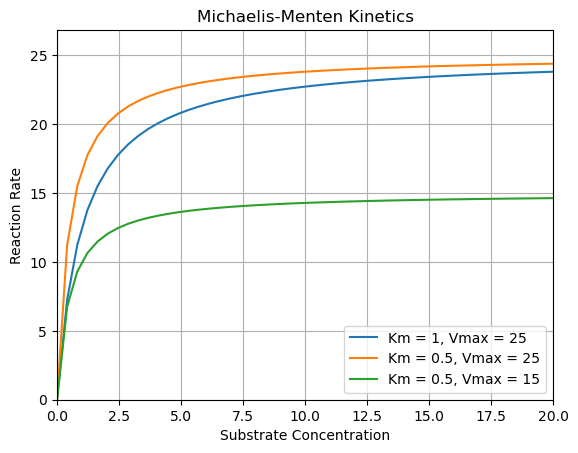

In [9]:
#Plotting
plt.plot(S_val, reaction_rates1, label='Km = 1, Vmax = 25')
plt.plot(S_val, reaction_rates2, label='Km = 0.5, Vmax = 25')
plt.plot(S_val, reaction_rates3, label='Km = 0.5, Vmax = 15')
plt.xlabel('Substrate Concentration')
plt.ylabel('Reaction Rate')
plt.title('Michaelis-Menten Kinetics')
plt.legend()
plt.grid(True)
# Set appropriate limits for the axes
plt.xlim(0, max(S_val))
plt.ylim(0, max(max(reaction_rates1), max(reaction_rates2), max(reaction_rates3)) * 1.1)

plt.show()

# Question 2: Lineweaver-Burk (30p)
The Lineweaver-Burk plot is a handy tool for determining the Michaelis-Menten parameters from data, especially in those times where smart fitting-tools did not yet exist.

In this question we will analyse this method step by step.

This question uses the data in MeasuredData.csv, which is a generated data list
of measured substrate concentrations [S] and reaction rates [V].

(a) Plot the data and retrieve the Michaelis-Menten parameters.
Have a look into the curve_fit-function of scipy.

In [14]:
"Note: Upload the measuredData.csv file to colab before you run this cell."
measured_data = pd.read_csv("./Data/Data/measuredData.csv", skiprows=1, header=None)

In [15]:
S_measured = measured_data.iloc[:, 0]
V_measured = measured_data.iloc[:, 1]

In [16]:
#Finding the optimal Vmax and Km for the given dataset using the curve-fit function.
parameters, covariance = curve_fit(mm, S_measured, V_measured)
Vmax_measured, Km_measured = parameters

print("Vmax for measured data is", Vmax_measured)
print("Km for measured data is", Km_measured)
#print("reci: ", 1/Km_measured)

Vmax for measured data is 9.95368737780582
Km for measured data is 0.46236309437235323


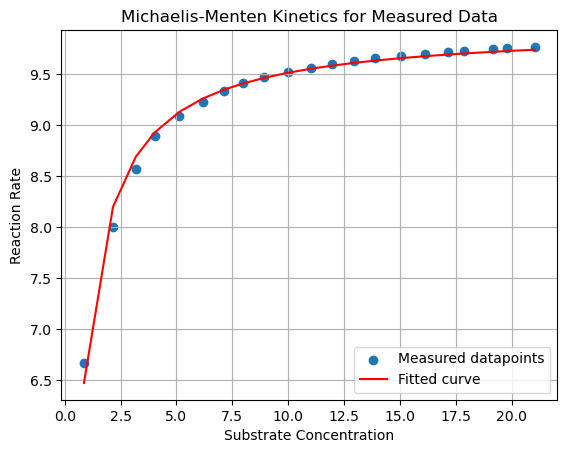

In [17]:
# Plotting "actual" values for the reaction rates that are given in the dataset
plt.scatter(S_measured, V_measured, label='Measured datapoints')

# Generating and plotting "expected" values for the reaction rates based on the optimized Vmax and Km values
V_fitted = mm(S_measured, Vmax_measured, Km_measured)
plt.plot(S_measured, V_fitted, color='red', label='Fitted curve')
plt.xlabel('Substrate Concentration')
plt.ylabel('Reaction Rate')
plt.title('Michaelis-Menten Kinetics for Measured Data')
plt.legend()
plt.grid(True)
plt.show()

(b) Now we create the Lineweaver-Burk plot. Instead of plotting the values of S and V, The Lineweaver-Burk plot plots 1/V against 1/S. Describe your plot.

In [18]:
def reciprocal(S,V):
  return 1/S, 1/V

reciprocal_S, reciprocal_V = reciprocal(S_measured, V_measured)

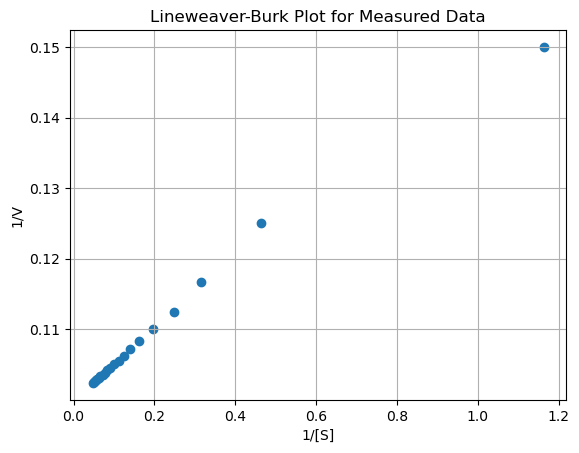

In [19]:
# Plot the Lineweaver-Burk plot
plt.scatter(reciprocal_S, reciprocal_V)
plt.xlabel('1/[S]')
plt.ylabel('1/V')
plt.title('Lineweaver-Burk Plot for Measured Data')
plt.grid(True)
plt.show()

(c) The Lineweaver-Burk plot shows a linear relation between 1/V and 1/S.

Rewrite the Michaelis-Menten equation and obtain the terms of a and b in the equation below.

Answer:

1/V = 1/Vmax + (Km * 1) / (Vmax * [S])

(i.e. a = 1/Vmax, b = Km/Vmax)

(d) The Michaelis-Menten parameters can be determined by the intersections with the vertical and horizontal axis. Use the equation obtained in (c) to show that the location of these intersections are {0, 1/Vmax} and {-1/Km, 0}.

Answer: (To be explained better.) Line equation y = mx + c to show c (i.e. y-intercept) is 1/Vmax. Equating it to 0 to show x-intercept is -1/Km.

(e) Retrieve the Michaelis-Menten parameters from your Lineweaver-Burk plot. Do they correspond with the parameters obtained in (a)?

In [20]:
#Km is the slope, Vmax is y-intercept
# Extend the line obtained in previous question, using linear regression
#slope, intercept = curve_fit(linregress, reciprocal_S, reciprocal_V)
slope, intercept, r_value, p_value, std_err = linregress(reciprocal_S, reciprocal_V)
#slope = Km/Vmax so Km = slope*Vmax
# Calculate x and y intercepts

y_intercept = 1/intercept #Vmax
x_intercept = slope * y_intercept #Km value

#print(x_intercept, y_intercept)



print("Km: ", x_intercept, "Vmax: ", y_intercept)
#print("slope: ", slope, "intercept: ", intercept)


Km:  0.4367262422948784 Vmax:  9.916773248612174


**Question 3: Inhibitors (30p)**

Inhibitors are small compounds that can reversibly bind to the enzyme and
change its activity. They can play important roles regulating metabolic re-
action, but can also act as a poison. There are three types of reversible in-
hibitors: Competitive inhibitors, Uncompetitive inhibitors and Noncompetitive
inhibitors. The equilibrium between E and I and the enzyme complex EI is
characterized by the Inhibition Constant Ki.

**Competitive inhibitors**
The competitive inhibitor binds to the free enzyme only, so I is a direct com-
petitor for S.

**Uncompetitive inhibitors**

The uncompetitive inhibitor binds to the enzyme-substrate complex and pre-
vents the conversion from substrate to product.

**Noncompetitive inhibitors**

The noncompetitive inhibitor binds to both the free enzyme and the enzyme-
substrate complex. S can still bind to the enzyme-inhibitor complex, but the
inhibitor makes the conversion from substrate to product impossible.